## EasyVisa Project


## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:


import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
visa = pd.read_csv('/content/drive/My Drive/Data Science/Easy Visa Data.csv') ##  Fill the blank to read the data

In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [ ]:
data.head() ##View top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail() ##View last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset

In [ ]:
data.shape ##View dimensions of the data

(25480, 12)

### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

In [ ]:
#Check for missing values in any of the rows
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Exploratory Data Analysis

#### Let's check the statistical summary of the data

In [ ]:
data.describe() ##  print the statistical summary of the data

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Fixing the negative values in number of employees columns

In [ ]:
data.loc[data['no_of_employees'] < 0].shape #Check how many # of employees have been set a negative value

(33, 12)

In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = data["no_of_employees"].abs()## Write the function to convert the values to a positive number

In [ ]:
data.loc[data['no_of_employees'] < 0].shape #Check how many # of employees have been set a negative value

(0, 12)

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [ ]:
# checking the number of unique values
data["case_id"].nunique() ## check unique values in the mentioned column

25480

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

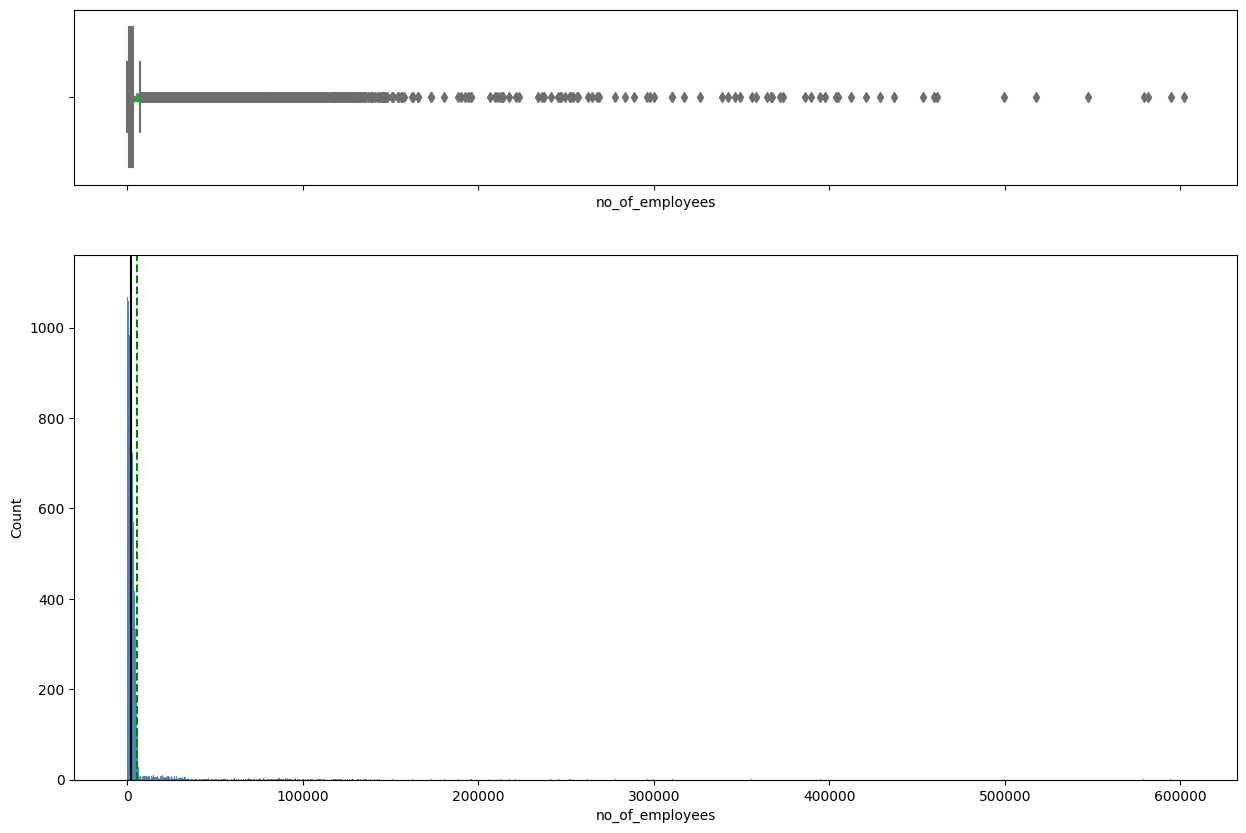

In [ ]:
histogram_boxplot(data, "no_of_employees")

#### Observations on prevailing wage

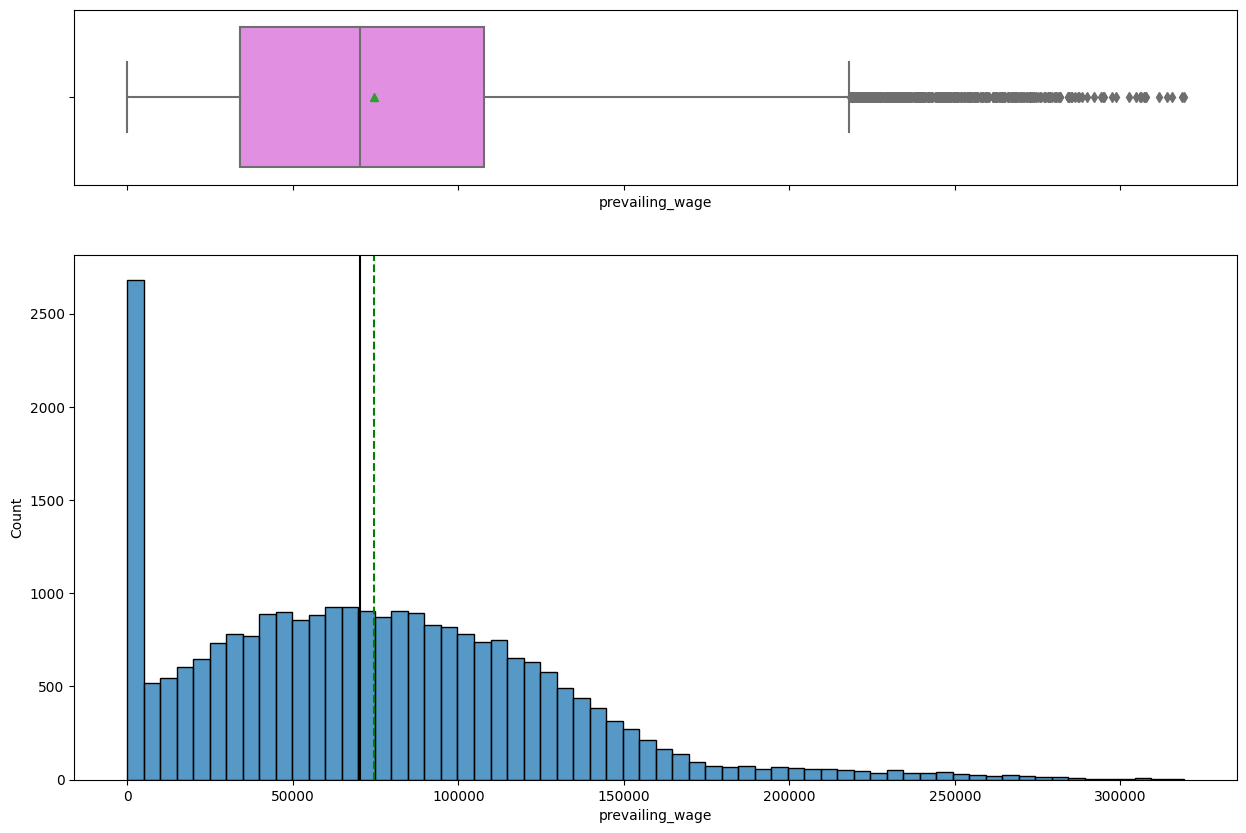

In [ ]:
histogram_boxplot(data, 'prevailing_wage') ## create histogram_boxplot for prevailing wage

In [ ]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.089207,1979.409929,74455.814592
std,22877.917453,42.366929,52815.942327
min,11.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

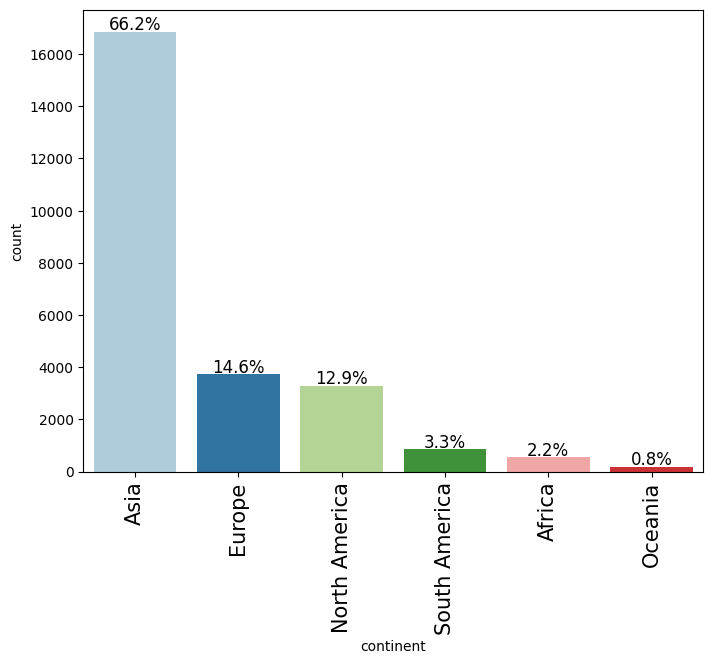

In [ ]:
labeled_barplot(data, "continent", perc=True)

#### Observations on education of employee

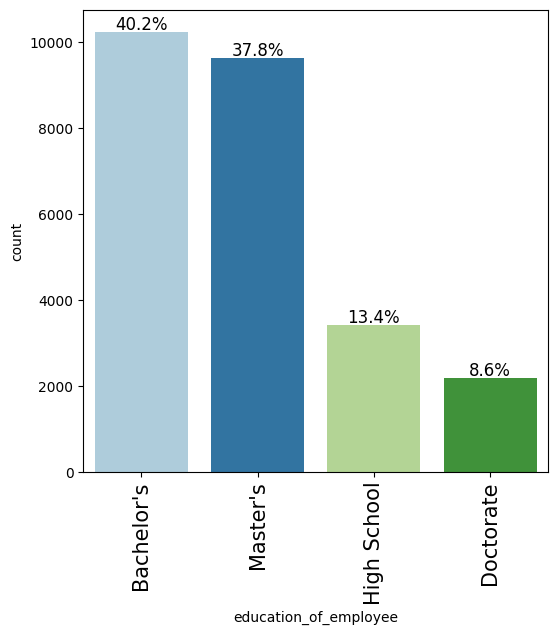

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)  ## create labeled_barplot for education of employee

#### Observations on job experience

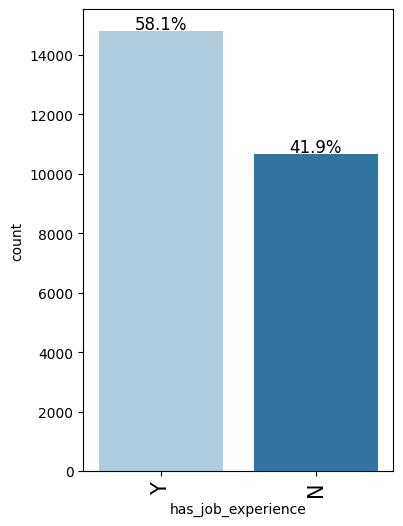

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True)  ## create labeled_barplot for job experience

#### Observations on job training

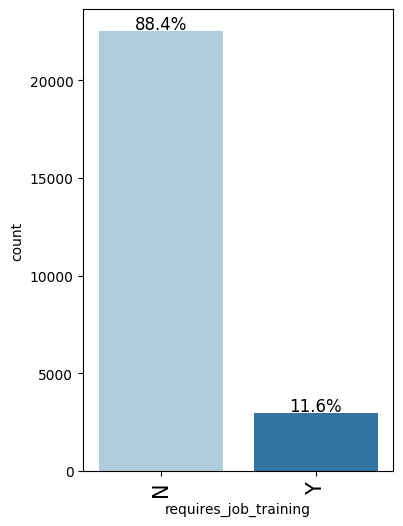

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True)  ## create labeled_barplot for job training

#### Observations on region of employment

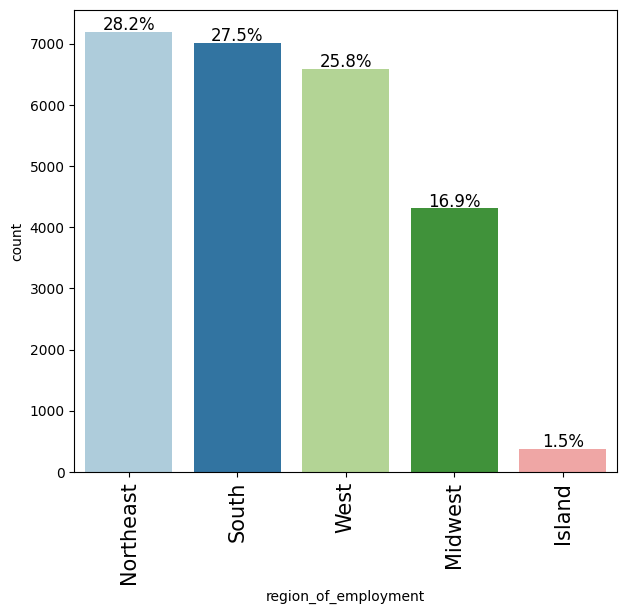

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True)  ## create labeled_barplot for region of employment

#### Observations on unit of wage

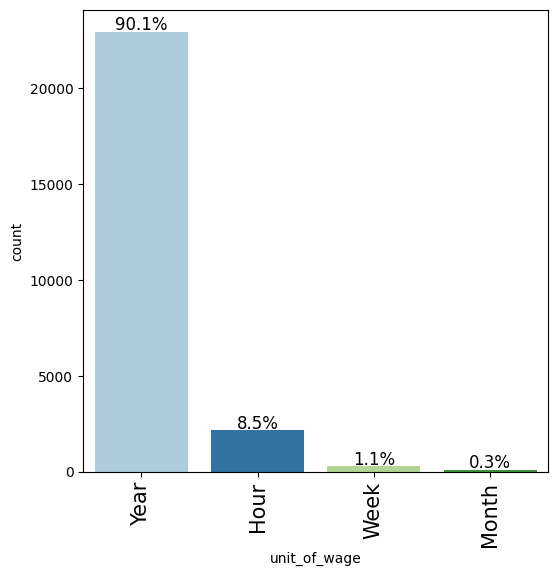

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True)  ## create labeled_barplot for unit of wage

#### Observations on case status

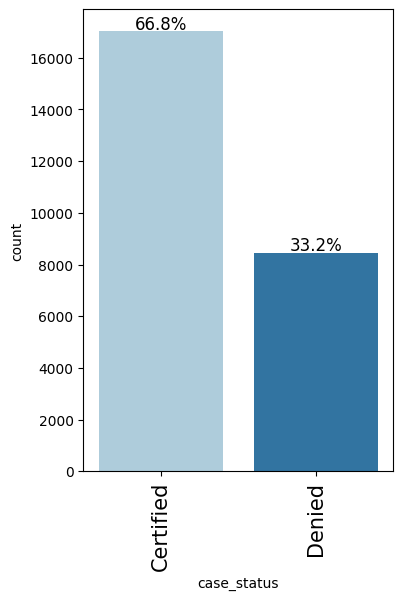

In [ ]:
labeled_barplot(data, "case_status", perc=True)  ## create labeled_barplot for case status

### Bivariate Analysis

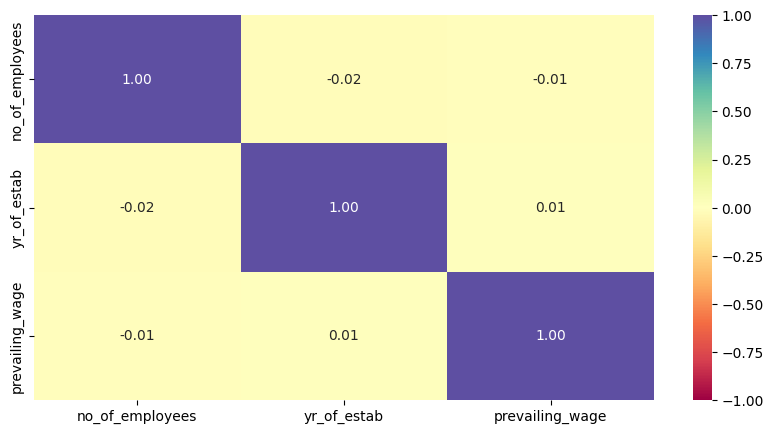

In [ ]:
## find the correlation between the variables
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

plt.show()

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


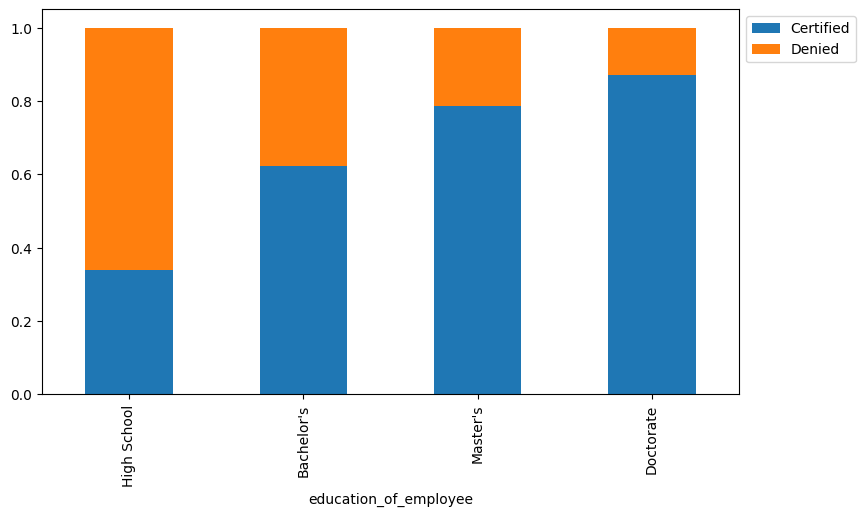

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

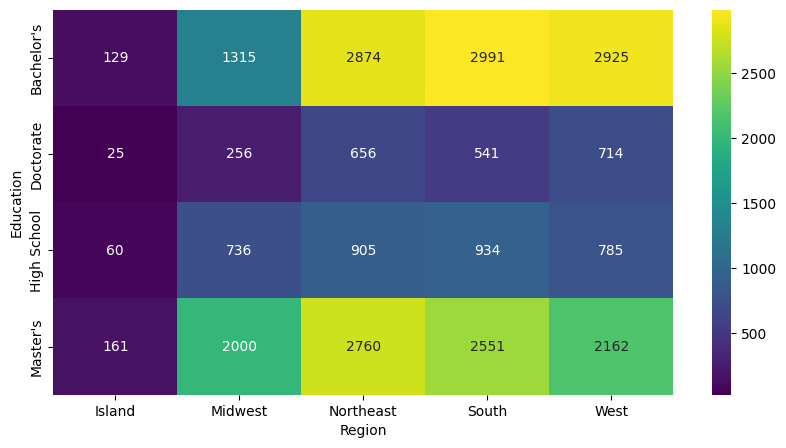

In [ ]:
## plot heatmap for the crosstab between education and region of employment
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


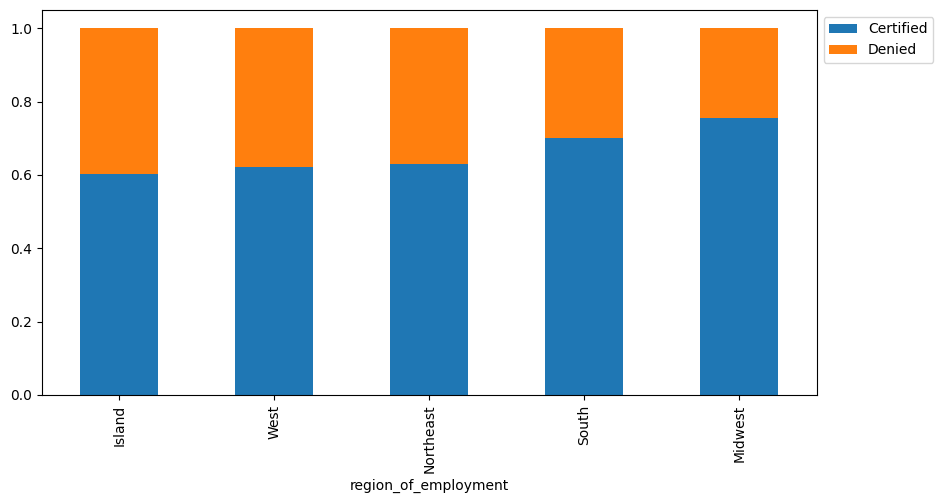

In [ ]:
stacked_barplot(data, "region_of_employment", "case_status") ## plot stacked barplot for region of employment and case status

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


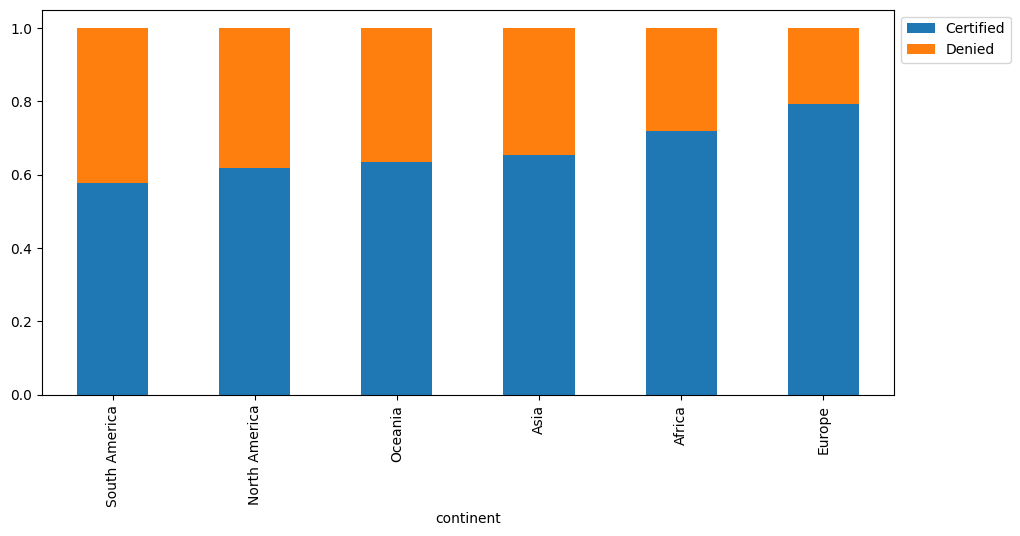

In [ ]:
stacked_barplot(data, "continent", "case_status") ## plot stacked barplot for continent and case status

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


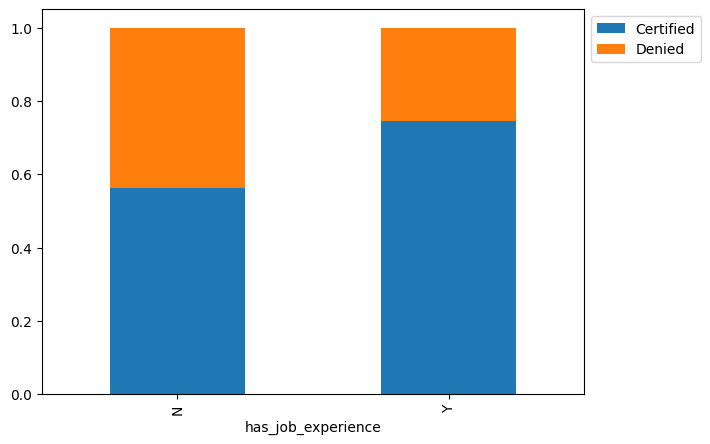

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status") ## plot stacked barplot for job experience and case status

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


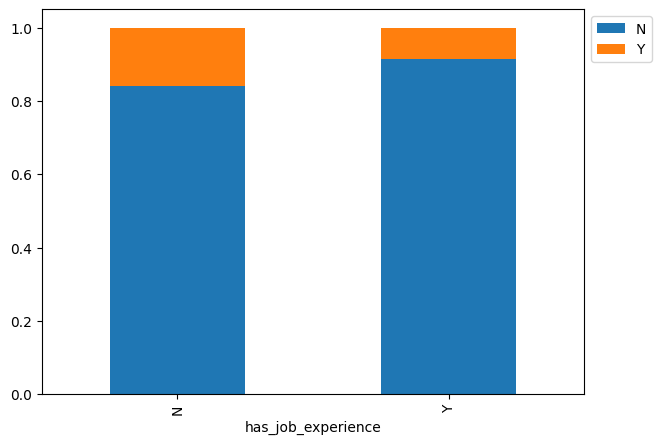

In [ ]:
stacked_barplot(data, "has_job_experience", "requires_job_training") ## plot stacked barplot for job experience and requires_job_training

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

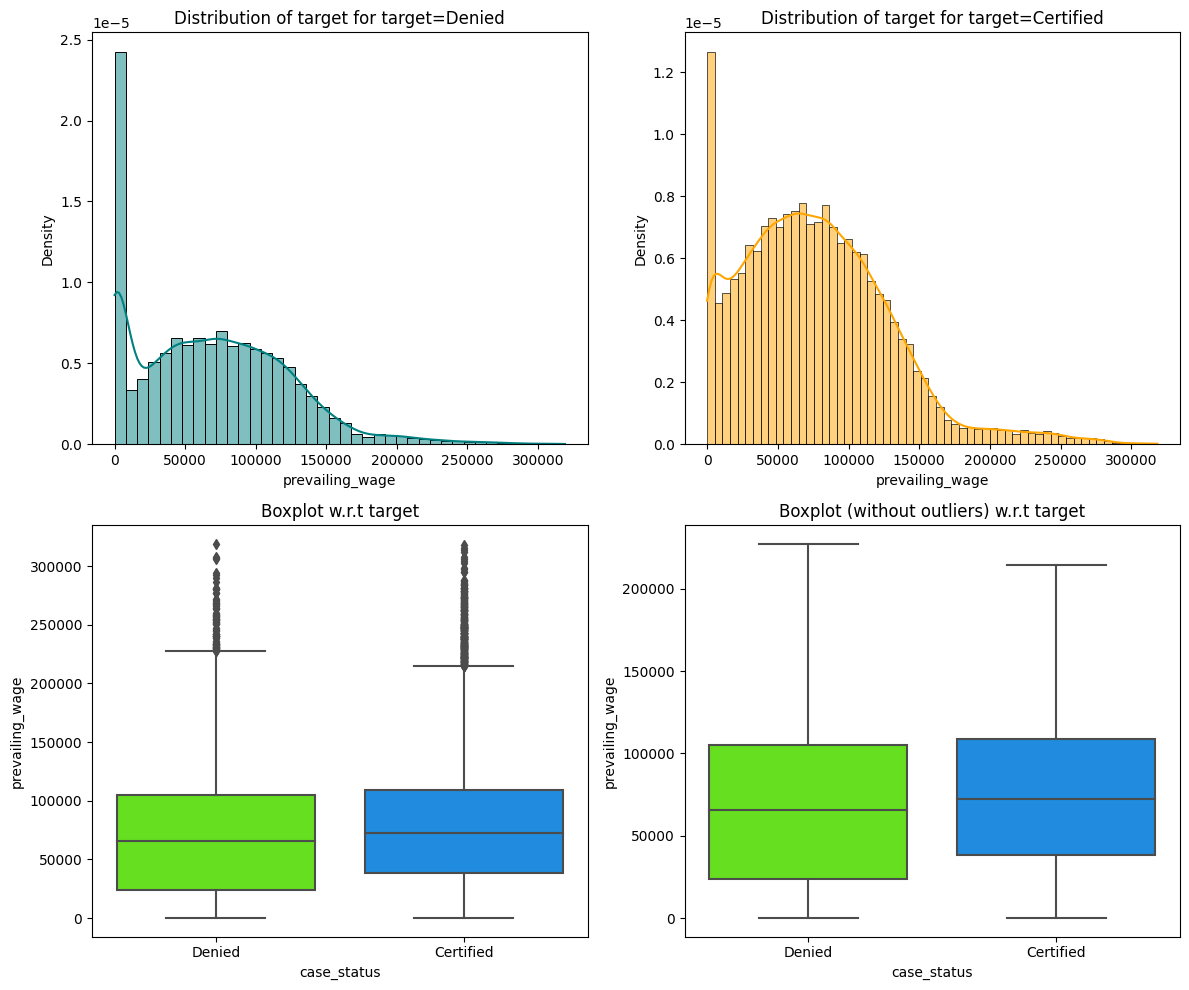

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status") ## find distribution of prevailing wage and case status

#### Checking if the prevailing wage is similar across all the regions of the US

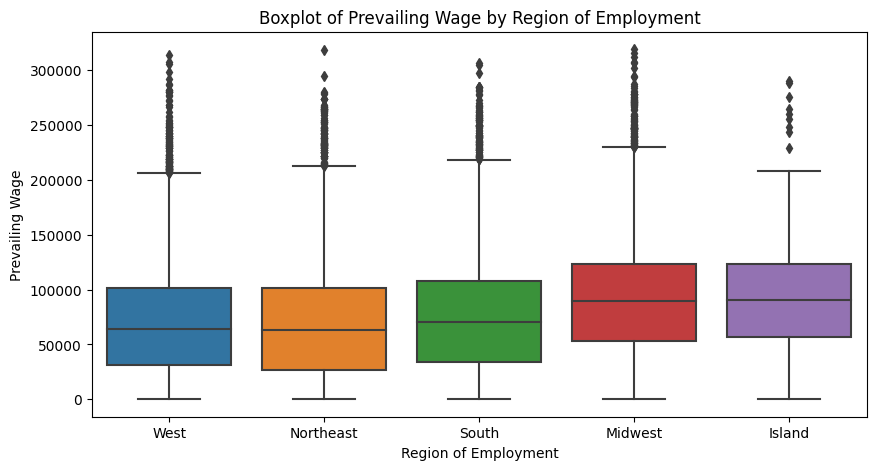

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='region_of_employment', y='prevailing_wage')
plt.xlabel('Region of Employment')
plt.ylabel('Prevailing Wage')
plt.title('Boxplot of Prevailing Wage by Region of Employment')
plt.show()

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


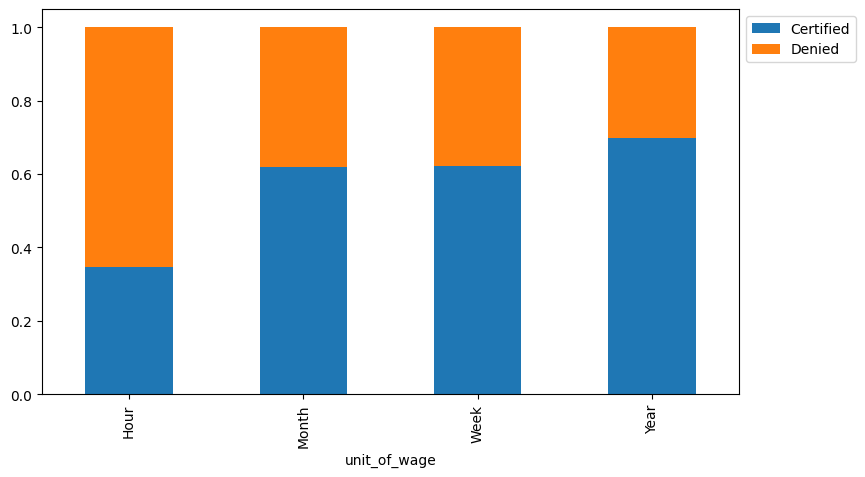

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status") ## plot stacked barplot for unit of wage and case status

## Data Preprocessing & Feature Engineering

### Outlier Check

- Let's check for outliers in the data.

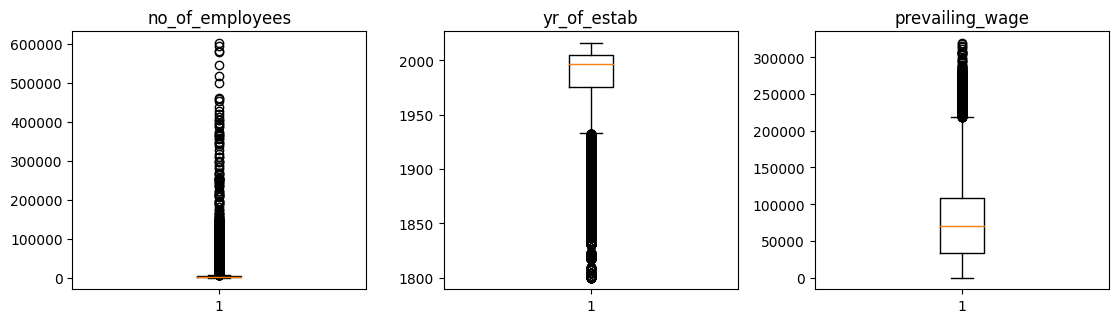

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

All the outliers will be left untreated since they are real data.

###**Feature Engineering**:

1. All Prevailing Wages will be standardized to an annual salary using the following conversion rates:
a) hourly: * 2820
b) weekly: * 52
c) monthly: * 12

2. The 'Unit of Wage' column will be dropped since all the prevailing wages are now standardized to an annual rate.

3. The year of establishment of a company will be dropped. Instead, the age of the company will be used: Age = 2023 - Year of Employment

In [ ]:
# Convert the prevailing wages to yearly values
conversion_factors = {
    'Hour': 2080,
    'Week': 52,
    'Month': 12,
    'Year': 1
}
data['prevailing_wage'] = data.apply(lambda row: row['prevailing_wage'] * conversion_factors[row['unit_of_wage']], axis=1)

In [ ]:
# Dropping the Unit of Wage Column
data = data.drop('unit_of_wage', axis=1)

In [ ]:
#Adding Age of Company column in years
data['Age_of_Company'] = 2023 - data['yr_of_estab']

In [ ]:
#Dropping the Year of Establishment Column
data = data.drop('yr_of_estab', axis=1)

In [ ]:
#Dropping the Case ID Column
data = data.drop('case_id', axis=1)

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(["case_status"], axis=1) ## drop case status from the data
Y = data["case_status"]

X = pd.get_dummies(X)  ## create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, stratify=Y) ## split the data into train and test in the ratio 70:30

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (19110, 24)
Shape of test set :  (6370, 24)
Percentage of classes in training set:
1    0.66787
0    0.33213
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2,2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [ ]:
# Base Decision Tree WITHOUT any pruning.
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

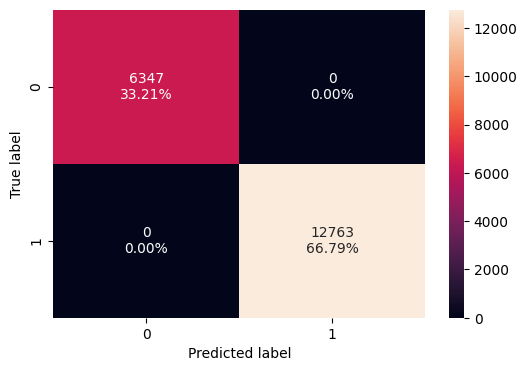

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train) ## create confusion matrix for train data on base tree

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train) ## check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

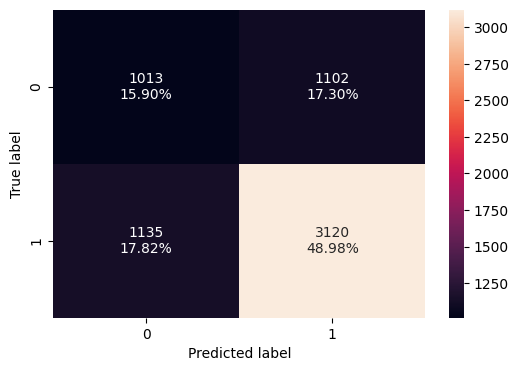

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## create confusion matrix for test data

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.648823,0.733255,0.738986,0.736109


In [ ]:
X.head()

,no_of_employees,prevailing_wage,Age_of_Company,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_N,has_job_experience_Y,requires_job_training_N,requires_job_training_Y,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,full_time_position_N,full_time_position_Y
0,14513,1231782.032,16,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1
1,2412,83425.650,21,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1
2,44444,122996.860,15,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
3,98,83434.030,126,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1
4,1082,149907.390,18,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1


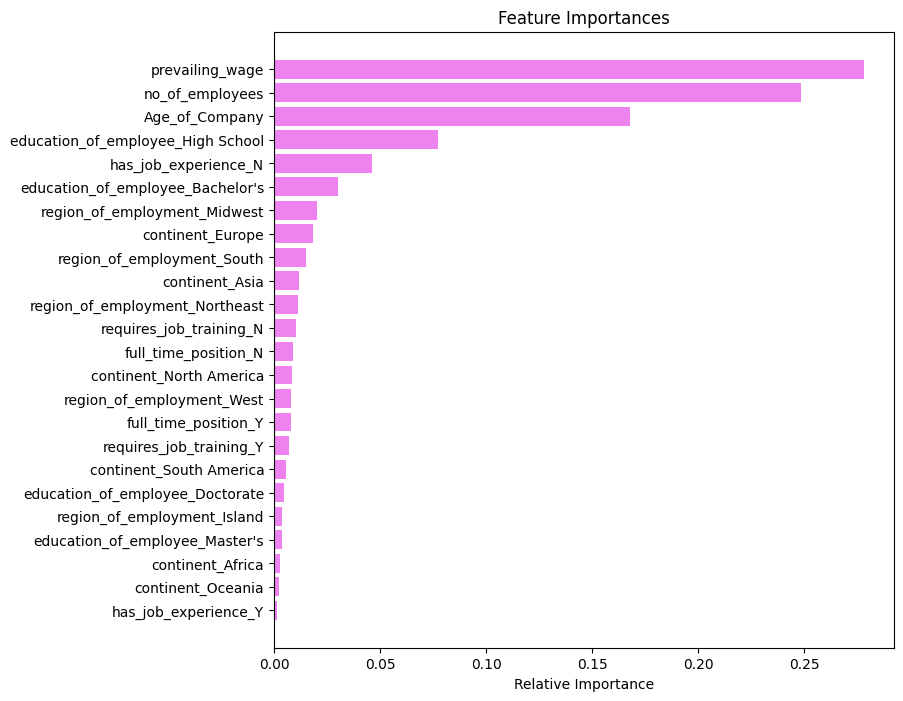

In [ ]:
#Important Feature Calculation of Base Tree
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The decision tree is fully grown without restriction, and it can be seen that it does perfectly well on training data but is also capturing noise and is not generalizing well on unseen data. The important features suggest that the prevailing wage and the number of employees play the largest role in deciding if a visa will be certified or not. It is interesting to note that the Age of the Company also plays a big role.

### Hyperparameter Tuning - Decision Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring= scorer, cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

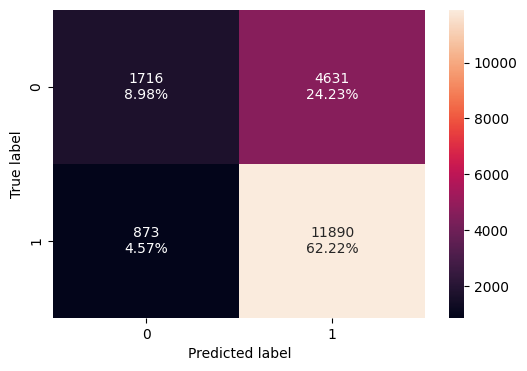

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train) ## create confusion matrix for train data

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train) ## check performance for train data on tuned estimator
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.711983,0.931599,0.71969,0.812048


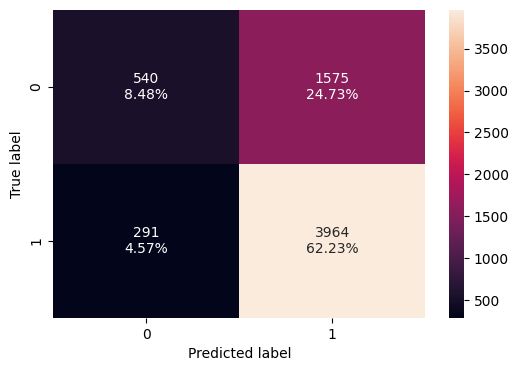

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test) ## create confusion matrix for test data

In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(dtree_estimator, X_test, y_test) ## check performance for test data on tuned estimator
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.707064,0.93161,0.715653,0.809475


## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [ ]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

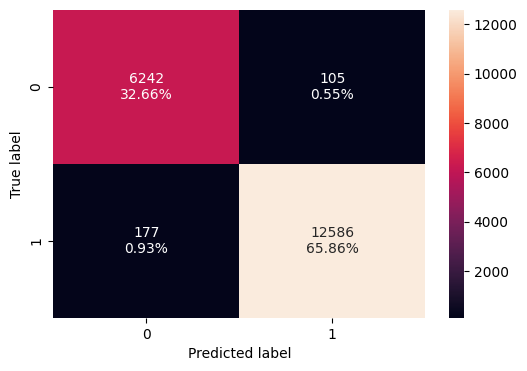

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_train, y_train) ## create confusion matrix for train data

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_estimator, X_train, y_train) ## check performance on train data
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985243,0.986132,0.991726,0.988921


#### Checking model performance on test set

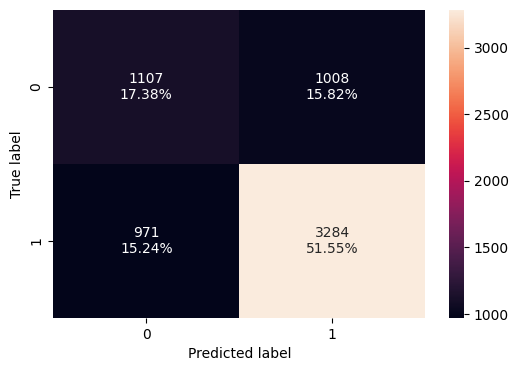

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test) ## create confusion matrix for test data

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_estimator, X_test, y_test) ## check performance for test data
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.689325,0.771798,0.765144,0.768457


### Hyperparameter Tuning - Bagging Classifier

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring= acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

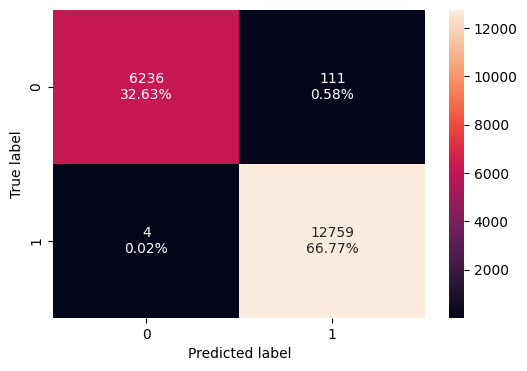

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train) ## create confusion matrix for train data

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train) ## check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.993982,0.999687,0.991375,0.995514


#### Checking model performance on test set

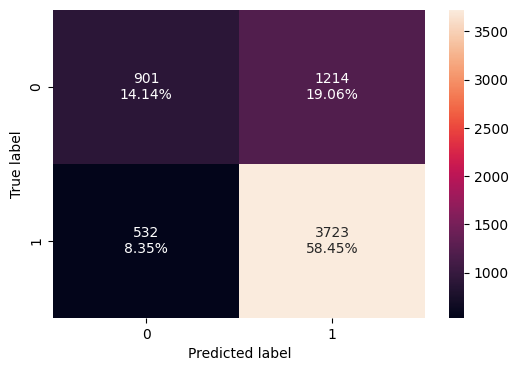

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test) ## create confusion matrix for test data

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test) ## check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.725903,0.874971,0.754102,0.810052


The Hypertuned Bagging Classifier is providing a good F1 score on both the training and testing sets.

### Random Forest

In [ ]:
# Fitting the model
rf_estimator=RandomForestClassifier(random_state=1, class_weight = 'balanced')
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

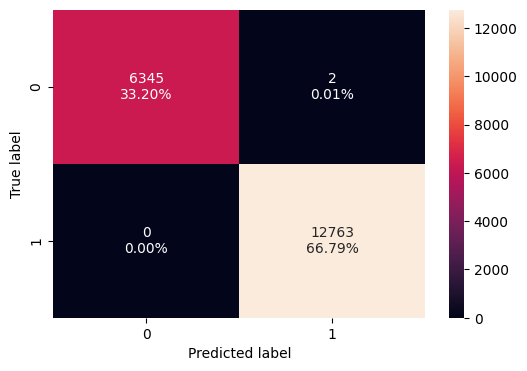

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train) ## create confusion matrix for train data

In [ ]:
# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train) ## check performance on train data
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999895,1.0,0.999843,0.999922


#### Checking model performance on test set

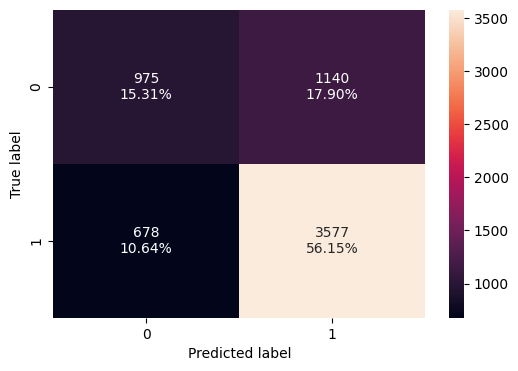

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test) ## create confusion matrix for test data

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test) ## check performance for test data
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.7146,0.840658,0.758321,0.79737


### Hyperparameter Tuning - Random Forest

In [97]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring= acc_scorer, cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=25,
                       oob_score=True, random_state=1)

#### Checking model performance on training set

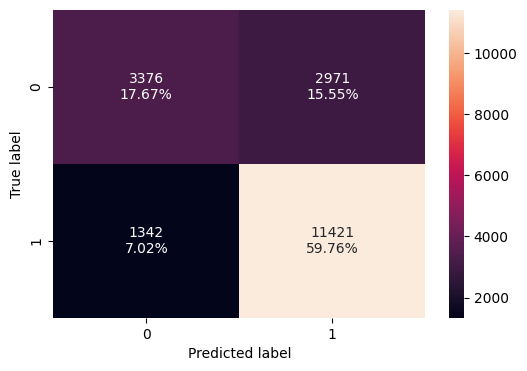

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train) ## create confusion matrix for train data

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train) ## check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.774307,0.894852,0.793566,0.841171


#### Checking model performance on test set

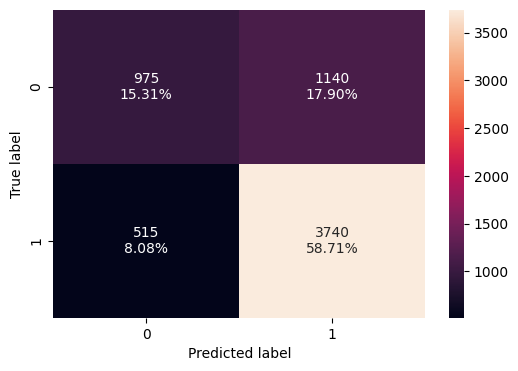

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test) ## create confusion matrix for test data

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) ## check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.740188,0.878966,0.766393,0.818829


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [ ]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

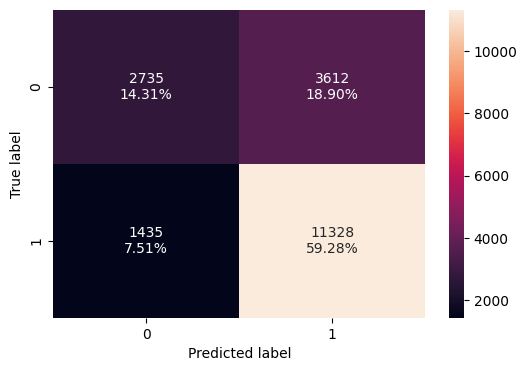

In [ ]:
confusion_matrix_sklearn(abc, X_train, y_train) ## create confusion matrix for train data

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(abc, X_train, y_train) ## check performance on train data
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.735897,0.887566,0.758233,0.817818


#### Checking model performance on test set

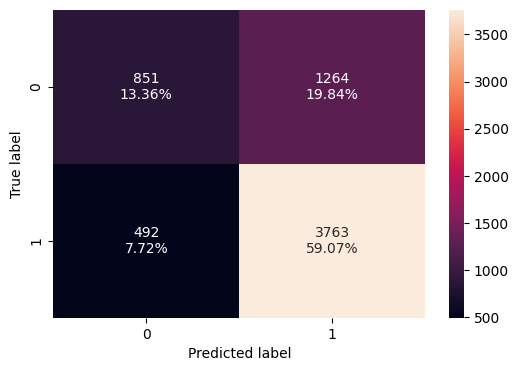

In [ ]:
confusion_matrix_sklearn(abc, X_test, y_test) ## create confusion matrix for test data

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(abc, X_test, y_test) ## check performance for test data
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724333,0.884371,0.748558,0.810817


### Hyperparameter Tuning - AdaBoost Classifier

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring= acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=90, random_state=1)

#### Checking model performance on training set

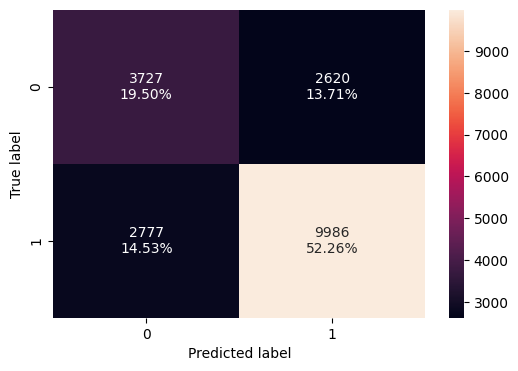

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train) ## create confusion matrix for train data

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train) ## check performance for train data on tuned estimator
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.717582,0.782418,0.792162,0.78726


#### Checking model performance on test set

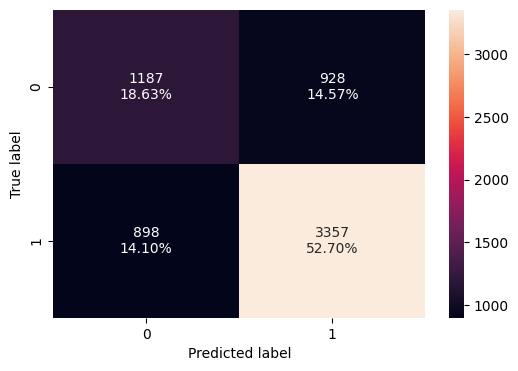

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test) ## create confusion matrix for test data

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test) ## check performance for test data on tuned estimator
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.713344,0.788954,0.783431,0.786183


### Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set

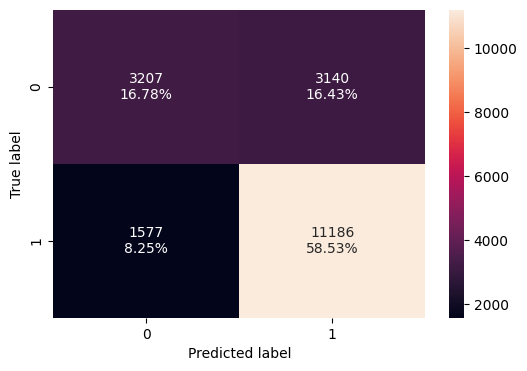

In [ ]:
confusion_matrix_sklearn(gbc, X_train, y_train) ## create confusion matrix for train data

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gbc, X_train, y_train) ## check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.753166,0.87644,0.780818,0.82587


#### Checking model performance on test set

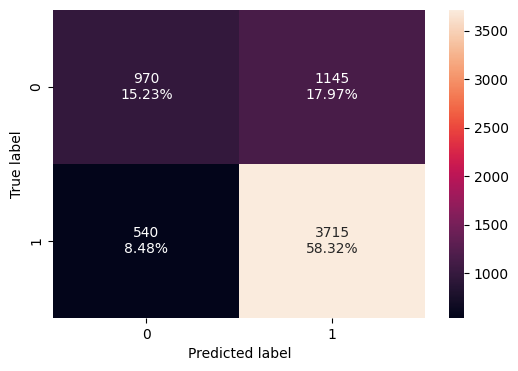

In [ ]:
confusion_matrix_sklearn(gbc, X_test, y_test) ## create confusion matrix for test data

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gbc, X_test, y_test) ## check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.735479,0.87309,0.764403,0.81514


### Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring= acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

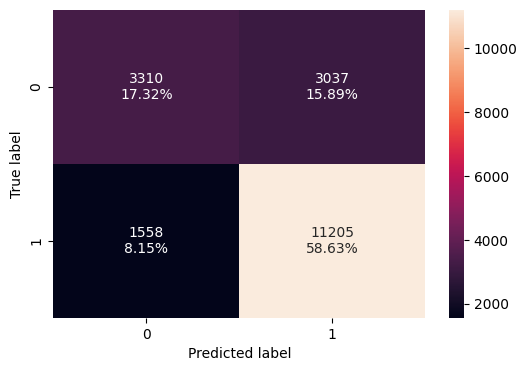

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train) ## create confusion matrix for train data

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train) ## check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75955,0.877928,0.786757,0.829846


#### Checking model performance on test set

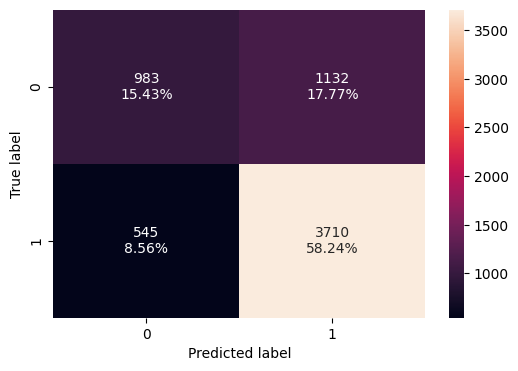

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test) ## create confusion matrix for test data

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test) ## check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.736735,0.871915,0.766212,0.815654


### Note - You can choose **not to build** XGBoost if you have any installation issues

### XGBoost Classifier

In [ ]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train,y_train) ## define XGBoost Classifier with random state = 1 and eval_metric="logloss"


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

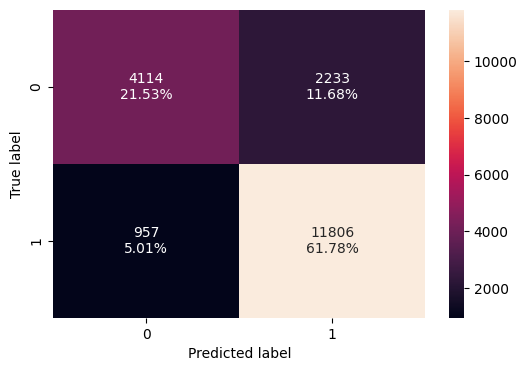

In [ ]:
confusion_matrix_sklearn(xgb, X_train, y_train) ## create confusion matrix for train data

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb, X_train, y_train) ## check performance on train data
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.833072,0.925018,0.840943,0.880979


#### Checking model performance on test set

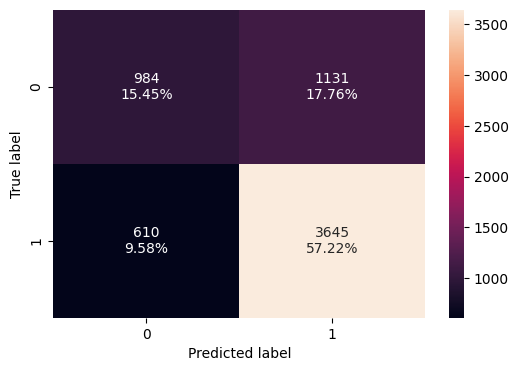

In [ ]:
confusion_matrix_sklearn(xgb, X_test, y_test) ## create confusion matrix for test data

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb, X_test, y_test) ## check performance for test data
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.726688,0.856639,0.763191,0.80722


### Hyperparameter Tuning - XGBoost Classifier

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

#### Checking model performance on training set

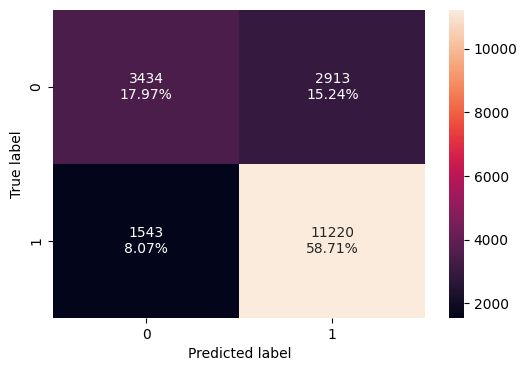

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train) ## create confusion matrix for train data

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train) ## check performance for train data on tuned estimator
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.766824,0.879104,0.793887,0.834325


#### Checking model performance on test set

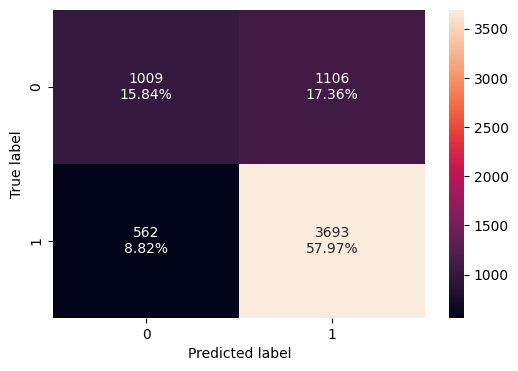

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test) ## create confusion matrix for test data

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test) ## check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738148,0.86792,0.769535,0.815772


## Stacking Classifier

In [98]:
#Stacking Classifier using tuned Estimators
estimators = [
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=90,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsam...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=200, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

### Checking model performance on training set

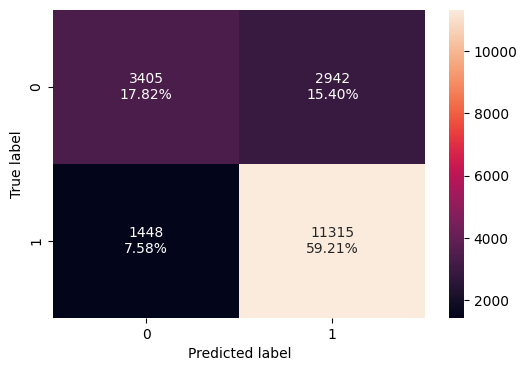

In [ ]:
confusion_matrix_sklearn(stacking_estimator, X_train, y_train) ## create confusion matrix for train data

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_estimator, X_train, y_train) ## check performance on train data
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.770277,0.886547,0.793645,0.837528


### Checking model performance on test set

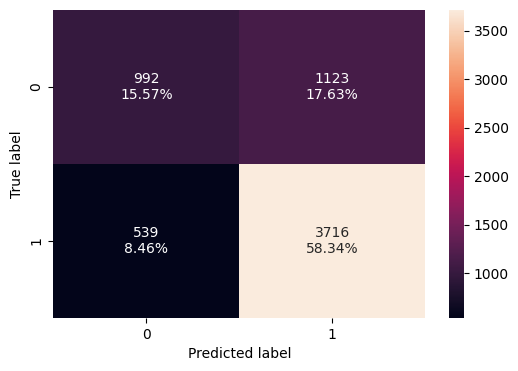

In [ ]:
confusion_matrix_sklearn(stacking_estimator, X_test, y_test) ## create confusion matrix for test data

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_estimator, X_test, y_test) ## check performance for test data
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.739089,0.873325,0.767927,0.817242


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.711983,0.985243,0.993982,0.999895,0.774307,0.735897,0.717582,0.753166,0.759550,0.833072,0.766824,0.770277
Recall,1.0,0.931599,0.986132,0.999687,1.000000,0.894852,0.887566,0.782418,0.876440,0.877928,0.925018,0.879104,0.886547
Precision,1.0,0.719690,0.991726,0.991375,0.999843,0.793566,0.758233,0.792162,0.780818,0.786757,0.840943,0.793887,0.793645
F1,1.0,0.812048,0.988921,0.995514,0.999922,0.841171,0.817818,0.787260,0.825870,0.829846,0.880979,0.834325,0.837528


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.648823,0.707064,0.689325,0.725903,0.714600,0.740188,0.724333,0.713344,0.735479,0.736735,0.726688,0.738148,0.739089
Recall,0.733255,0.931610,0.771798,0.874971,0.840658,0.878966,0.884371,0.788954,0.873090,0.871915,0.856639,0.867920,0.873325
Precision,0.738986,0.715653,0.765144,0.754102,0.758321,0.766393,0.748558,0.783431,0.764403,0.766212,0.763191,0.769535,0.767927
F1,0.736109,0.809475,0.768457,0.810052,0.797370,0.818829,0.810817,0.786183,0.815140,0.815654,0.807220,0.815772,0.817242


### Important features of the final model

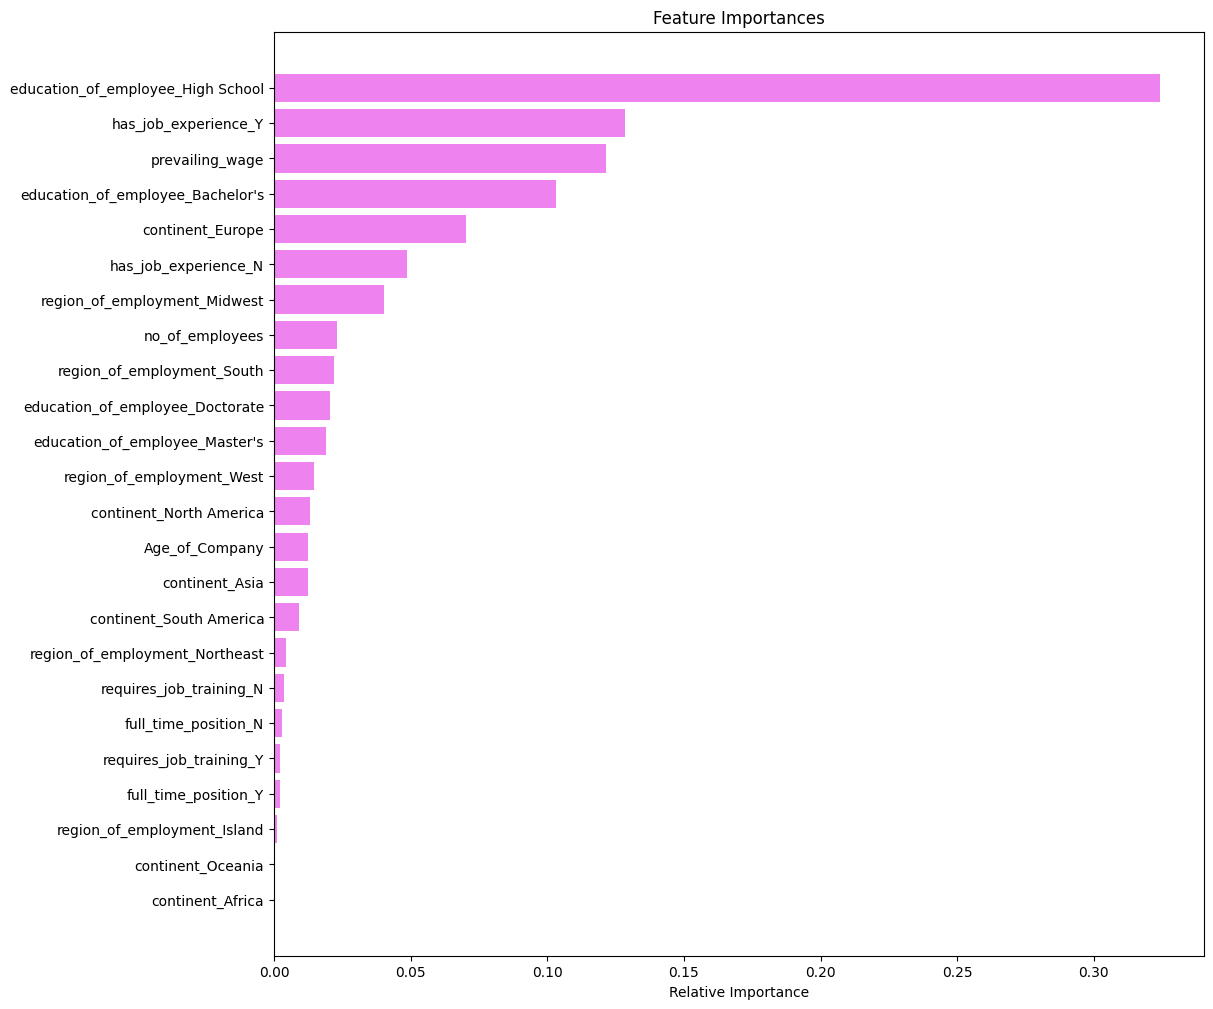

In [ ]:
#Important Features of Gradient Boost Model
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

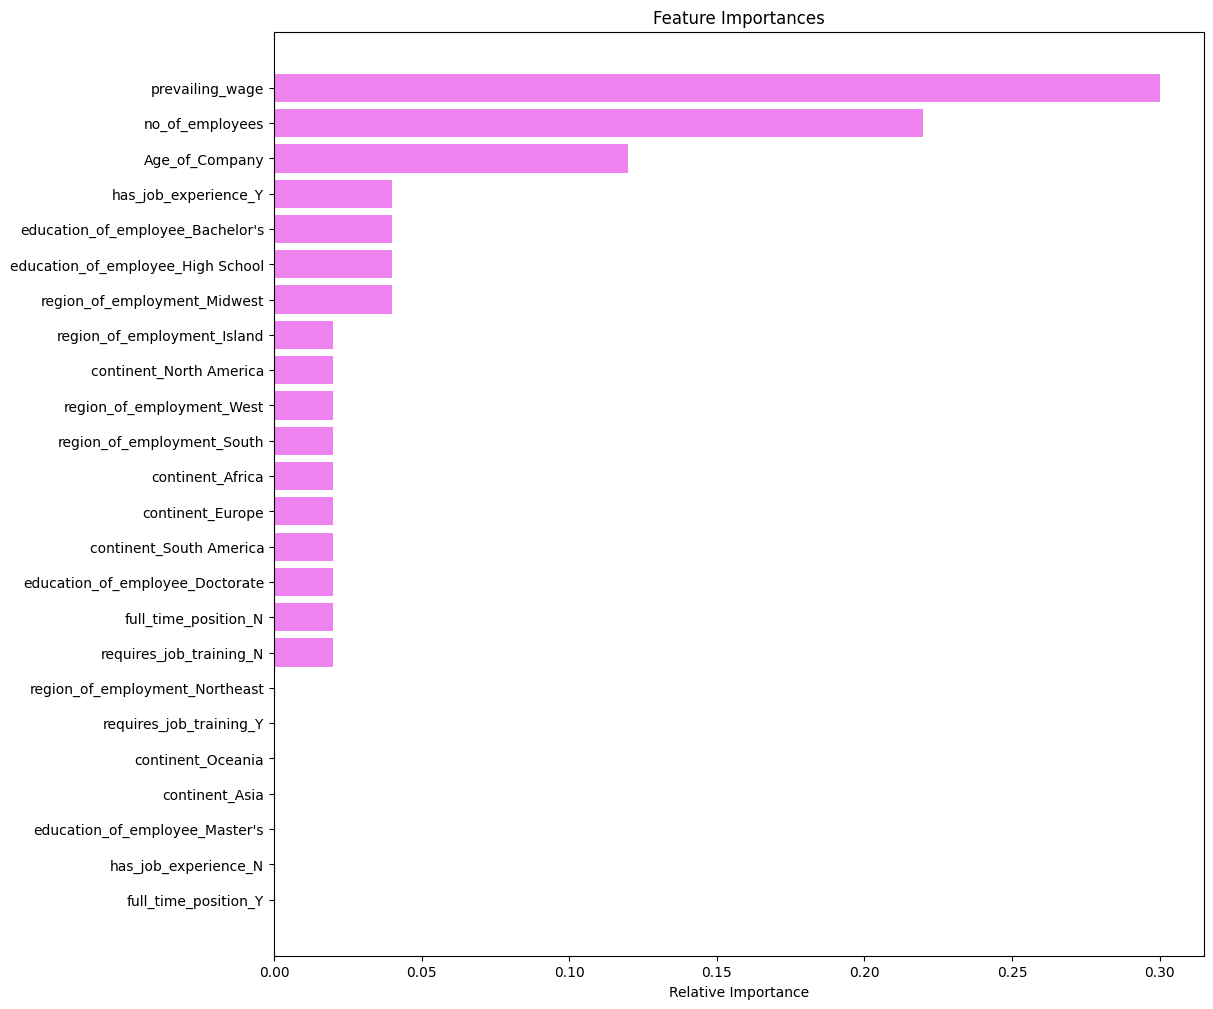

In [ ]:
#Important Features of Gradient Boost Model
feature_names = X_train.columns
importances = abc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Business Insights and Recommendations

Prioritize prevailing wage, education, and job experience: Given that prevailing wage, education level, and job experience are identified as important features in both models, focus on these factors as key criteria for shortlisting candidates. Emphasize the applicant's qualifications, skills, and experience relevant to the job position to increase the likelihood of visa approval.

Consider the age of the company and number of employees: The inclusion of the age of the company and the number of employees as important features in both models suggests that the stability and resources of the employer influence the visa approval process. Take these factors into account when evaluating employers, as they indicate the capacity to support foreign workers and comply with labor regulations.

Streamline the job training evaluation process: Since job training is identified as barely important, allocate fewer resources and time to evaluating candidates' training programs or certifications. Focus instead on assessing their relevant work experience, skills, and qualifications that directly align with the job requirements. This approach helps streamline the selection process and ensures resources are utilized efficiently.

Focus on qualifications and skills rather than employment status: Since the distinction between full-time and part-time positions has no bearing on visa certification, prioritize evaluating applicants based on their qualifications, skills, and experience relevant to the job requirements. This ensures that the visa approval process remains focused on the applicant's ability to perform the job effectively rather than their employment status.

Assess the weightage of features for model selection: Given the varying importance of features between the gradient boosting and AdaBoost models, carefully consider the weightage assigned to each feature based on EasyVisa's priorities and the OFLC's requirements. Choose the model that aligns with the features deemed more crucial and provides a better understanding of the decision-making process.
